# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

#----- the file "main.py" contains the CFPCA method, as well as other miscellaneous functions ----
#----- Currently, we change directories to access the parent directory, where the main file is located ----

os.chdir('..')
from main import *

#---- os.chdir('..') goes back to the parent directory, if main.py is in the same folder as this file, it can be omitted ---

# Define functions

In [2]:
t = np.linspace(-1,1,100)

def w1(t):
    return np.sin(2*np.pi*t)

def w2(t):
    return np.cos(2*np.pi*t)


def s1(t):
    return t**2 * np.exp(t)
def s2(t):
    return t*np.exp(-t)


# Generate foreground and background data

In [3]:
def error_func(t, amplitude=1):
    return amplitude * np.sin(2 * np.pi * t)

def generate_observations_sim2(t, N, M, error_func):
    x_observations = []
    y_observations = []

    for _ in range(N):
        a1 = np.random.normal(0, 1)
        a2 = np.random.normal(0, 1)
        a3 = np.random.normal(0, 1)
        a4 = np.random.normal(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_func(t)
        x = a1*w1(t) + a2*w2(t) + a3*s1(t)+a4*s2(t)+error
        x_observations.append(x)

    for _ in range(M):
        a1 = np.random.normal(0, 1)
        a2 = np.random.normal(0, 1)

        error = np.random.normal(0, 1, len(t)) * error_func(t)
        y =  a1*s1(t) + a2*s2(t)+error
        y_observations.append(y)
        
    return x_observations, y_observations



# Figure 2 (a-d)

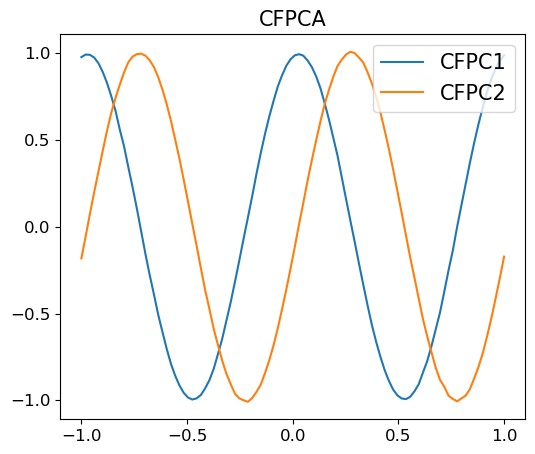

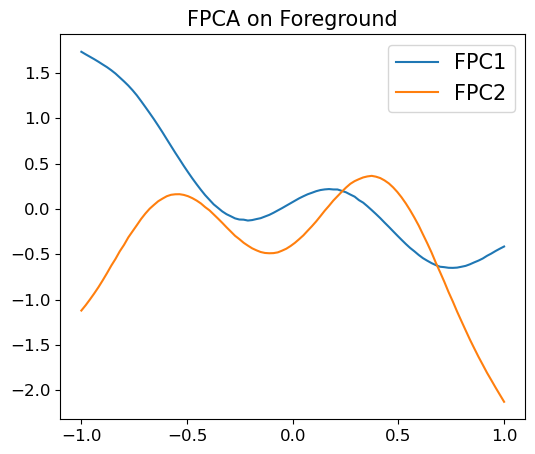

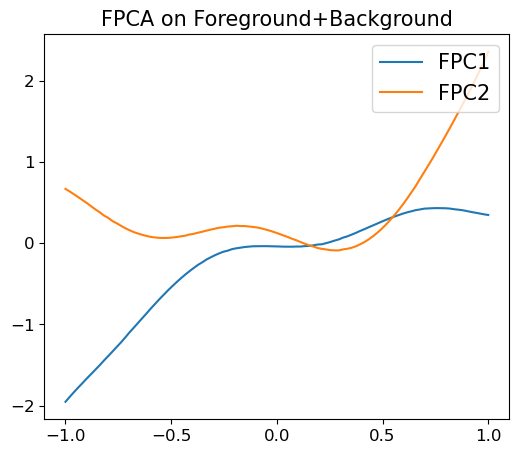

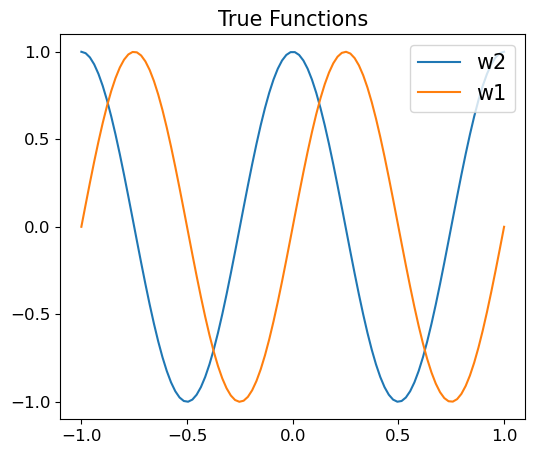

In [21]:
np.random.seed(1)
N,M = 100000,100000
X, Y = generate_observations_sim2(t,N,M,error_func) #switch sim number
components_XY = CFPCA(X+Y,Y,0,t,False, True)[0]
components_X = CFPCA(X,Y,0,t,False, True)[0]
component_CFPCA = CFPCA(X,Y,1,t,False, True)[0]

plt.figure(figsize = (6,5))
plt.plot(t, component_CFPCA[:,0])
plt.plot(t, component_CFPCA[:,1])
plt.legend(['CFPC1', 'CFPC2'], loc = "upper right", fontsize = 15)
plt.title("CFPCA", fontsize = 15)
plt.xticks(np.linspace(-1,1,5),fontsize = 12)
plt.yticks(np.linspace(-1,1,5),fontsize = 12)


plt.figure(figsize = (6,5))
plt.plot(t, components_X[:,0])
plt.plot(t, components_X[:,1])
plt.legend(['FPC1', 'FPC2'], loc = "upper right", fontsize = 15)
plt.title("FPCA on Foreground", fontsize = 15)
plt.xticks(np.linspace(-1,1,5),fontsize = 12)
plt.yticks(fontsize = 12)

plt.figure(figsize = (6,5))
plt.plot(t, components_XY[:,0])
plt.plot(t, components_XY[:,1])
plt.legend(['FPC1', 'FPC2'], loc = "upper right", fontsize = 15)
plt.title("FPCA on Foreground+Background", fontsize = 15)
plt.xticks(np.linspace(-1,1,5),fontsize = 12)
plt.yticks(fontsize = 12)

plt.figure(figsize = (6,5))
plt.plot(t, w2(t))
plt.plot(t, w1(t))
plt.legend(['w2', 'w1'], loc = "upper right", fontsize = 15)
plt.title("True Functions", fontsize = 15)
plt.xticks(np.linspace(-1,1,5),fontsize = 12)
plt.yticks(np.linspace(-1,1,5),fontsize = 12)

plt.show();

# Table 2 - Simulation 2

In [4]:
np.random.seed(1)

def run_simulation_table(n_simulations, t, N, M):
    
    fpc1_X = []
    fpc2_X = []
    
    fpc1_XY = []
    fpc2_XY = []
    
    cfpc1 = []
    cfpc2 = []

    for _ in range(n_simulations):
        X, Y = generate_observations_sim2(t,N,M,error_func)  
        components_XY = CFPCA(X+Y,Y,0,t,False, True)[0]
        components_X = CFPCA(X,Y,0,t,False, True)[0]
        component_CFPCA = CFPCA(X,Y,1,t,False, True)[0]
        
        fpc1_XY1 = l2_distance(w2,components_XY[:,0], t)
        fpc2_XY2 = l2_distance(w1,components_XY[:,1], t)
        
        fpc1_X1 = l2_distance(w2,components_X[:,0], t)
        fpc2_X2 = l2_distance(w1,components_X[:,1], t)
        
        cfpc1_1 = l2_distance(w2,component_CFPCA[:,0], t)
        cfpc2_2 = l2_distance(w1,component_CFPCA[:,1], t)
        
        fpc1_XY.append(fpc1_XY1)
        fpc2_XY.append(fpc2_XY2)
        
        fpc1_X.append(fpc1_X1)
        fpc2_X.append(fpc2_X2)
        
        cfpc1.append(cfpc1_1)
        cfpc2.append(cfpc2_2)
    
    return cfpc1, cfpc2, fpc1_XY, fpc2_XY, fpc1_X, fpc2_X

ns = [100000]  

n_simulations =  40

results = {'N': [], 'cfpc1': [], 'cfpc2': [], 'fpc1_XY': [], 'fpc2_XY': [],'fpc1_X': [], 'fpc2_X': []}

for n in ns:
    cfpc1, cfpc2, fpc1_XY, fpc2_XY, fpc1_X, fpc2_X = run_simulation_table(n_simulations, t, n, n)
    results['N'].append(n)
    results['cfpc1'].append((np.mean(cfpc1), np.std(cfpc1)))
    results['cfpc2'].append((np.mean(cfpc2), np.std(cfpc2)))
    results['fpc1_XY'].append((np.mean(fpc1_XY), np.std(fpc1_XY)))
    results['fpc2_XY'].append((np.mean(fpc2_XY), np.std(fpc2_XY)))
    results['fpc1_X'].append((np.mean(fpc1_X), np.std(fpc1_X)))
    results['fpc2_X'].append((np.mean(fpc2_X), np.std(fpc2_X)))
    
for key, values in results.items():
    if key != 'N':
        print(f"{key}: {values[0][0]:.4f} ({values[0][1]:.4f})")


cfpc1: 0.1440 (0.1404)
cfpc2: 0.1434 (0.1395)
fpc1_XY: 1.3250 (0.0025)
fpc2_XY: 1.1494 (0.0027)
fpc1_X: 1.3163 (0.0057)
fpc2_X: 1.1332 (0.0058)


In [9]:
def run_simulation(n_simulations, t, N, M, alpha):

    distances_cfpc1 = []
    distances_cfpc2 = []

    for _ in range(n_simulations):
        X, Y = generate_observations_sim2(t, N, M, error_func)
        components = CFPCA(X, Y, alpha, t, False, True)[0]
        cfpc1 = l2_distance(w2, components[:, 0], t)
        cfpc2 = l2_distance(w1, components[:, 1], t)
        
        distances_cfpc1.append(cfpc1)
        distances_cfpc2.append(cfpc2)
    
    return distances_cfpc1, distances_cfpc2


ns = [8100, 22000, 60000, 162000, 440000, 1200000]

n_simulations =  40

all_distances_cfpc1 = []
all_distances_cfpc2 = []

for n in ns:
    distances_cfpc1, distances_cfpc2 = run_simulation(n_simulations, t, n, n, 1)
    all_distances_cfpc1.append(distances_cfpc1)
    all_distances_cfpc2.append(distances_cfpc2)


# Figure 3a

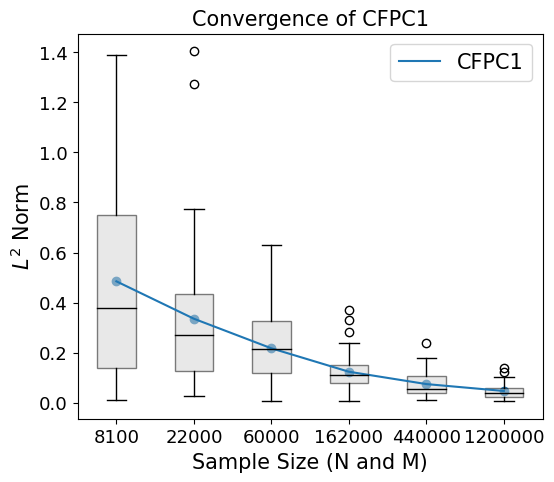

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))

line_color_cfpc1 = '#1f77b4'
line_color_cfpc2 = '#ff800f'

bp_cfpc1 = plot_boxplot_with_overlayed_mean(ax, all_distances_cfpc1, range(1, len(ns)+1), line_color_cfpc1, 'CFPC1')
ax.set_xticks(range(1, len(ns)+1))
ax.set_xticklabels(ns)
plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)  

ax.set_xlabel('Sample Size (N and M)', fontsize = 15)
ax.set_ylabel(r'$L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC1", fontsize = 15)
ax.legend(fontsize = 15)

# Figure 3b

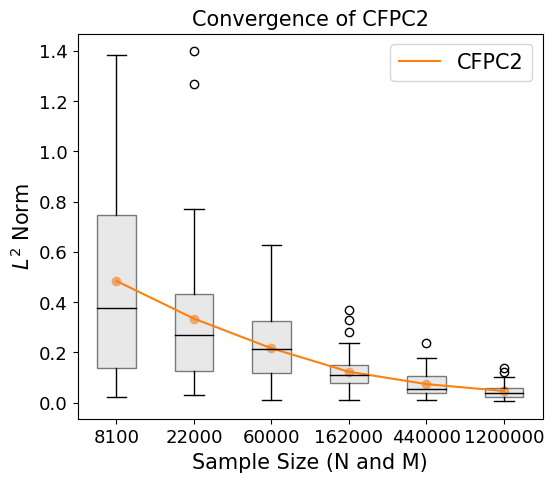

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))

bp_cfpc2 = plot_boxplot_with_overlayed_mean(ax, all_distances_cfpc2, range(1, len(ns)+1), line_color_cfpc2, 'CFPC2')

ax.set_xticks(range(1, len(ns)+1))
ax.set_xticklabels(ns, fontsize = 13)

plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)  

ax.set_xlabel('Sample Size (N and M)', fontsize = 15)
ax.set_ylabel(r'$L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC2", fontsize = 15)
ax.legend(fontsize = 15)

plt.show()

# Figure 3 (c-d)

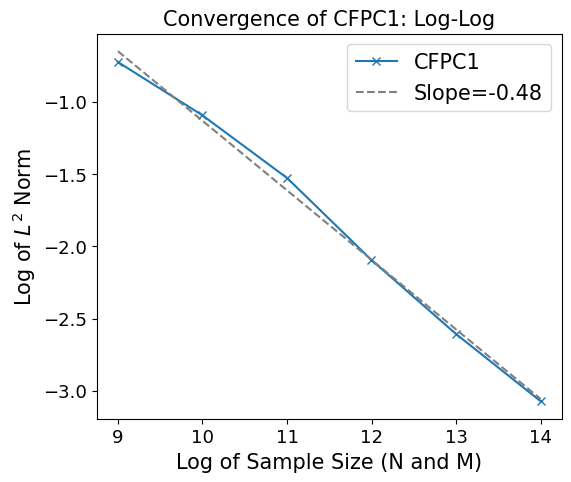

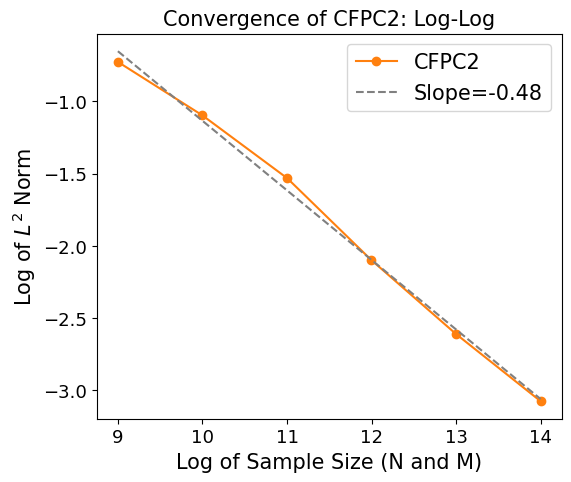

In [20]:
# Plotting the log-log plot for CFPC1
plt.figure(figsize=(6, 5))
plt.plot(log_ns, log_means_cfpc1, marker='x', linestyle='-', color=line_color_cfpc1, label='CFPC1')
plt.xlabel('Log of Sample Size (N and M)', fontsize=15)
plt.ylabel(r'Log of $L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC1: Log-Log", fontsize=15)
plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)

# Fit linear regression and plot the line
reg_cfpc1 = LinearRegression().fit(np.array(log_ns).reshape(-1, 1), np.array(log_means_cfpc1).reshape(-1, 1))
plt.plot(log_ns, reg_cfpc1.predict(np.array(log_ns).reshape(-1, 1)), color='gray', linestyle='--', label=f'Slope={reg_cfpc1.coef_[0][0]:.2f}')

plt.legend(fontsize=15)
plt.show()

# Plotting the log-log plot for CFPC2
plt.figure(figsize=(6, 5))
plt.plot(log_ns, log_means_cfpc2, marker='o', linestyle='-', color=line_color_cfpc2, label='CFPC2')
plt.xlabel('Log of Sample Size (N and M)', fontsize=15)
plt.ylabel(r'Log of $L^2$ Norm', fontsize=15)
plt.title("Convergence of CFPC2: Log-Log", fontsize=15)
plt.tick_params(axis='x', labelsize=13)  
plt.tick_params(axis='y', labelsize=13)

reg_cfpc2 = LinearRegression().fit(np.array(log_ns).reshape(-1, 1), np.array(log_means_cfpc2).reshape(-1, 1))
plt.plot(log_ns, reg_cfpc2.predict(np.array(log_ns).reshape(-1, 1)), color='gray', linestyle='--', label=f'Slope={reg_cfpc2.coef_[0][0]:.2f}')

plt.legend(fontsize=15)
plt.show()
